In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
df_binary = pd.read_csv('binary_class_data.csv')


In [3]:
df_binary.head()

,SN,HospitalNo2,MaritalStatus,AgeYrs,Sex,BedCategory,Department,Estimatedcost,InsPayorcategory,State,...,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,AdmissionDate,DischargeDate,LengthofStay,CE_NPS,NPS_Status
0,1,35236,Single,4.0,F,SPECIAL,PEDIATRIC,25000.0,PATIENT,Karnataka,...,4,4,4,4,4,7/18/2014,7/21/2014,3,9,Promotor
1,2,35237,Single,13.0,F,SPECIAL,PEDIATRIC,15000.0,PATIENT,Karnataka,...,4,4,4,4,4,7/11/2014,7/16/2014,5,10,Promotor
2,3,35234,Married,33.0,F,SEMISPECIAL,GYNAEC,70000.0,EXEMPTION,Karnataka,...,4,4,3,4,3,6/17/2014,7/20/2014,33,7,Detractor
3,4,35232,Married,51.0,F,SPECIAL,GYNAEC,150000.0,PATIENT,West Bengal,...,3,3,3,4,3,7/16/2014,7/22/2014,6,10,Promotor
4,5,35233,Married,31.0,F,SPECIAL,GYNAEC,100000.0,INSURANCE,Karnataka,...,4,4,4,4,4,7/13/2014,7/16/2014,3,10,Promotor


In [4]:
df_binary.shape

(5353, 52)

In [5]:
# Converting Categorical Value
df_binary['Sex'] = df_binary['Sex'].map( {'F': 0, 'M': 1} ).astype(int)


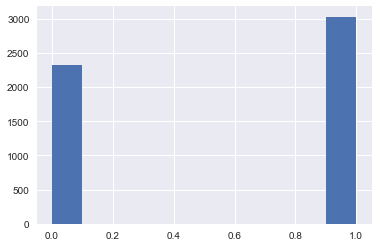

In [6]:
df_binary['Sex'].hist()

In [7]:
df_binary.describe()

,SN,HospitalNo2,AgeYrs,Sex,Estimatedcost,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,EM_IMMEDIATEATTENTION,EM_NURSING,...,NS_NURSEPROACTIVENESS,NS_NURSEPATIENCE,OVS_OVERALLSTAFFATTITUDE,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,LengthofStay,CE_NPS
count,5353.000000,5353.000000,5353.000000,5353.000000,5.353000e+03,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,...,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000
mean,2677.000000,46669.070054,39.463609,0.565851,8.261875e+04,3.625630,3.501027,3.343732,3.814123,3.841211,...,3.657949,3.676069,3.693256,3.628619,3.624323,3.267140,3.470017,3.373622,4.366710,8.504390
std,1545.422326,29151.632356,22.746197,0.495691,1.009360e+05,0.564218,0.583186,0.663980,0.455422,0.416636,...,0.531290,0.523781,0.492911,0.564206,0.560521,0.737374,0.637552,0.680548,5.101971,1.665292
min,1.000000,4167.000000,0.300000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1339.000000,19259.000000,25.000000,0.000000,3.000000e+04,3.000000,3.000000,3.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,8.000000
50%,2677.000000,45068.000000,37.000000,1.000000,5.000000e+04,4.000000,4.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,9.000000
75%,4015.000000,72261.000000,59.000000,1.000000,9.000000e+04,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,10.000000
max,5353.000000,98618.000000,97.000000,1.000000,1.500000e+06,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,80.000000,10.000000


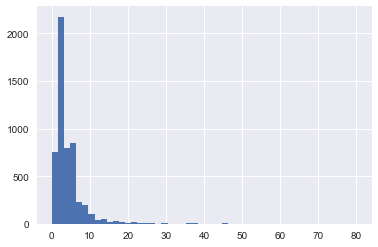

In [8]:

df_binary['LengthofStay'].hist(bins=50)


In [9]:
#To get a count of missing data in each variable
df_binary.isnull().sum()

SN                                0
HospitalNo2                       0
MaritalStatus                     0
AgeYrs                            0
Sex                               0
BedCategory                       0
Department                        0
Estimatedcost                     0
InsPayorcategory                  0
State                             0
Country                           0
STATEZONE                         0
CE_ACCESSIBILITY                  0
CE_CSAT                           0
CE_VALUEFORMONEY                  0
EM_IMMEDIATEATTENTION             0
EM_NURSING                        0
EM_DOCTOR                         0
EM_OVERALL                        0
AD_TIME                           0
AD_TARRIFFPACKAGESEXPLAINATION    0
AD_STAFFATTITUDE                  0
INR_ROOMCLEANLINESS               0
INR_ROOMPEACE                     0
INR_ROOMEQUIPMENT                 0
INR_ROOMAMBIENCE                  0
FNB_FOODQUALITY                   0
FNB_FOODDELIVERYTIME        

In [10]:
df_binary.dropna()

,SN,HospitalNo2,MaritalStatus,AgeYrs,Sex,BedCategory,Department,Estimatedcost,InsPayorcategory,State,...,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,AdmissionDate,DischargeDate,LengthofStay,CE_NPS,NPS_Status
0,1,35236,Single,4.0,0,SPECIAL,PEDIATRIC,25000.0,PATIENT,Karnataka,...,4,4,4,4,4,7/18/2014,7/21/2014,3,9,Promotor
1,2,35237,Single,13.0,0,SPECIAL,PEDIATRIC,15000.0,PATIENT,Karnataka,...,4,4,4,4,4,7/11/2014,7/16/2014,5,10,Promotor
2,3,35234,Married,33.0,0,SEMISPECIAL,GYNAEC,70000.0,EXEMPTION,Karnataka,...,4,4,3,4,3,6/17/2014,7/20/2014,33,7,Detractor
3,4,35232,Married,51.0,0,SPECIAL,GYNAEC,150000.0,PATIENT,West Bengal,...,3,3,3,4,3,7/16/2014,7/22/2014,6,10,Promotor
4,5,35233,Married,31.0,0,SPECIAL,GYNAEC,100000.0,INSURANCE,Karnataka,...,4,4,4,4,4,7/13/2014,7/16/2014,3,10,Promotor
5,6,35230,Single,0.5,0,SEMISPECIAL,PEDIATRIC,15000.0,EXEMPTION,Karnataka,...,4,4,4,4,4,7/15/2014,7/18/2014,3,10,Promotor
6,7,35231,Single,7.0,0,SPECIAL,PEDIATRIC,50000.0,PATIENT,Karnataka,...,3,3,3,3,4,7/17/2014,7/23/2014,6,10,Promotor
7,8,73391,Single,22.0,0,GENERAL,GEN,40000.0,INSURANCE,Karnataka,...,4,4,3,4,3,9/15/2014,9/20/2014,5,9,Promotor
8,9,73462,Married,65.0,1,SPECIAL,RENAL,150000.0,INSURANCE,Karnataka,...,4,4,4,4,4,9/16/2014,9/20/2014,4,9,Promotor
9,10,35238,Single,15.0,0,SEMISPECIAL,PEDIATRIC,20000.0,PATIENT,Karnataka,...,4,4,2,3,2,7/12/2014,7/16/2014,4,10,Promotor


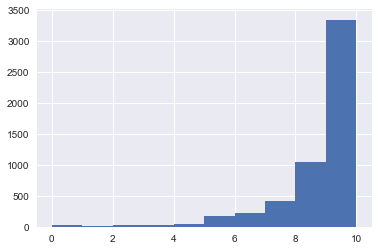

In [11]:
df_binary['CE_NPS'].hist()

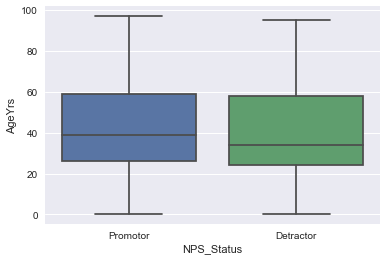

In [12]:

sns.boxplot(x='NPS_Status', y='AgeYrs', data=df_binary)
#sns.boxplot(x='NPS_Status', y='AgeYrs')

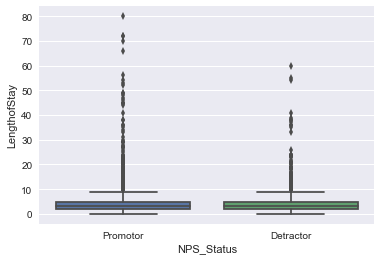

In [13]:
sns.boxplot(x='NPS_Status', y='LengthofStay', data=df_binary)

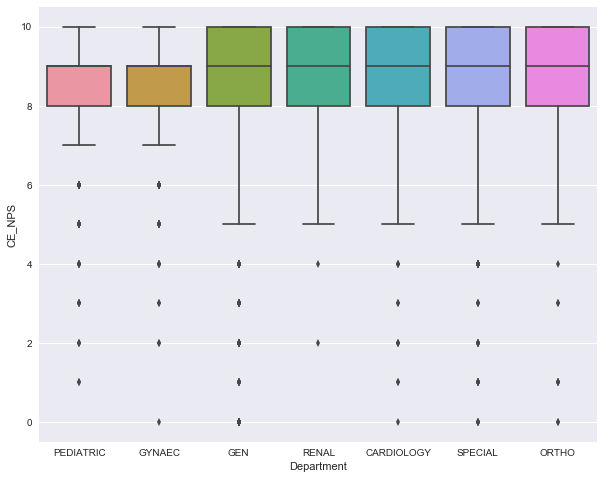

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.boxplot(x='Department', y='CE_NPS', data=df_binary, ax=ax)


In [15]:
df_binary['NPS_Status'].value_counts()

Promotor     3343
Detractor    2010
Name: NPS_Status, dtype: int64

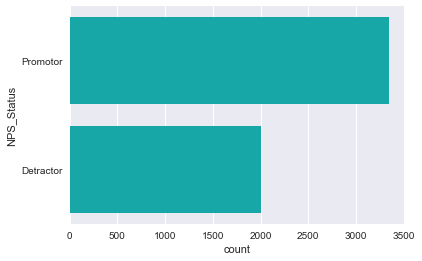

In [16]:
sns.countplot(y="NPS_Status", data=df_binary, color="c");

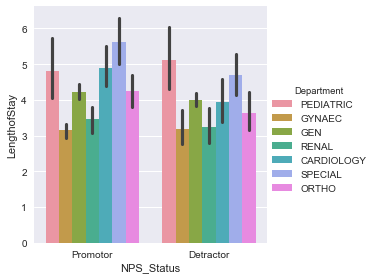

In [17]:
sns.factorplot(x="NPS_Status", y="LengthofStay", hue="Department", data=df_binary, kind="bar");

In [18]:
df1 = df_binary.groupby(['Department'])['LengthofStay'].mean()
df1

Department
CARDIOLOGY    4.619277
GEN           4.139109
GYNAEC        3.158960
ORTHO         4.036145
PEDIATRIC     4.942857
RENAL         3.396396
SPECIAL       5.313817
Name: LengthofStay, dtype: float64

In [19]:
df2 = df_binary.groupby(['Country'])['LengthofStay'].mean()
df2

Country
ANGOLA                          3.000000
Africa                         10.000000
BANGLADESH                      4.571429
CANADA                          4.000000
FIJI                            8.000000
GERMANY                         3.000000
INDIA                           4.338928
IRAQ                            9.900000
ISLAMIC REPUBLIC OF IRAN        5.000000
KENYA                           4.000000
MALDIVES                        3.500000
MAURITIUS                       5.142857
MONGOLIA                       14.000000
MOZAMBIQUE                      2.000000
NEPAL                           2.500000
NEW ZEALAND                     6.000000
NIGERIA                         6.400000
OMAN                            2.888889
QATAR                           2.000000
SAUDI ARABIA                    1.000000
SUDAN                           9.000000
Saudi Arabia                    7.000000
UGANDA                          3.000000
UNITED ARAB EMIRATES            1.500000
UNITED K

In [20]:
#converting NPS_Status variable from categorical to binary for classification 
df_binary['NPS_Status'] = df_binary['NPS_Status'].map({'Promotor':1, 'Detractor':0})
df_binary.head()

,SN,HospitalNo2,MaritalStatus,AgeYrs,Sex,BedCategory,Department,Estimatedcost,InsPayorcategory,State,...,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,AdmissionDate,DischargeDate,LengthofStay,CE_NPS,NPS_Status
0,1,35236,Single,4.0,0,SPECIAL,PEDIATRIC,25000.0,PATIENT,Karnataka,...,4,4,4,4,4,7/18/2014,7/21/2014,3,9,1
1,2,35237,Single,13.0,0,SPECIAL,PEDIATRIC,15000.0,PATIENT,Karnataka,...,4,4,4,4,4,7/11/2014,7/16/2014,5,10,1
2,3,35234,Married,33.0,0,SEMISPECIAL,GYNAEC,70000.0,EXEMPTION,Karnataka,...,4,4,3,4,3,6/17/2014,7/20/2014,33,7,0
3,4,35232,Married,51.0,0,SPECIAL,GYNAEC,150000.0,PATIENT,West Bengal,...,3,3,3,4,3,7/16/2014,7/22/2014,6,10,1
4,5,35233,Married,31.0,0,SPECIAL,GYNAEC,100000.0,INSURANCE,Karnataka,...,4,4,4,4,4,7/13/2014,7/16/2014,3,10,1


Feature ranking:
1. feature 0 (0.095937)
2. feature 2 (0.080099)
3. feature 5 (0.076149)
4. feature 37 (0.068891)
5. feature 4 (0.047842)
6. feature 11 (0.036709)
7. feature 3 (0.035821)
8. feature 36 (0.032683)
9. feature 15 (0.030720)
10. feature 18 (0.028567)
11. feature 16 (0.028153)
12. feature 22 (0.026703)
13. feature 1 (0.025809)
14. feature 20 (0.023634)
15. feature 10 (0.022431)
16. feature 34 (0.022100)
17. feature 13 (0.021649)
18. feature 17 (0.020745)
19. feature 14 (0.020344)
20. feature 19 (0.019672)
21. feature 25 (0.018195)
22. feature 12 (0.017321)
23. feature 35 (0.017042)
24. feature 21 (0.016822)
25. feature 33 (0.015239)
26. feature 6 (0.013017)
27. feature 8 (0.012788)
28. feature 9 (0.012583)
29. feature 32 (0.012356)
30. feature 30 (0.011961)
31. feature 27 (0.011685)
32. feature 26 (0.011392)
33. feature 24 (0.011376)
34. feature 29 (0.011145)
35. feature 23 (0.011138)
36. feature 7 (0.010912)
37. feature 31 (0.010361)
38. feature 28 (0.010009)


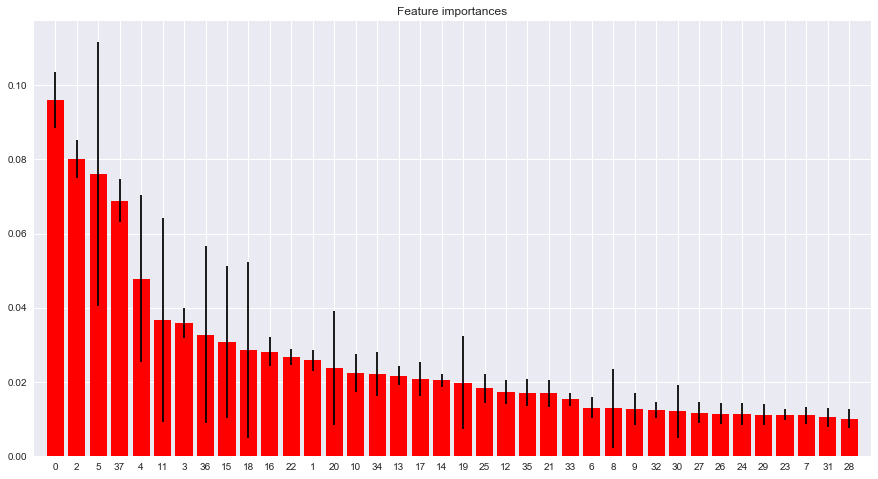

In [18]:
#Feature Selection - Using forests of trees to select 10 most important features 

y = df_binary['NPS_Status']
X = df_binary[['AgeYrs', 'Sex', 'Estimatedcost', 'CE_ACCESSIBILITY', 'CE_CSAT', 'CE_VALUEFORMONEY', 'EM_IMMEDIATEATTENTION', 'EM_NURSING', 'EM_DOCTOR', 'EM_OVERALL', 'AD_TIME', 'AD_TARRIFFPACKAGESEXPLAINATION', 'AD_STAFFATTITUDE', 'INR_ROOMCLEANLINESS', 'INR_ROOMPEACE', 'INR_ROOMAMBIENCE', 'FNB_FOODQUALITY', 'FNB_FOODDELIVERYTIME', 'FNB_DIETICIAN', 'FNB_STAFFATTITUDE', 'AE_ATTENDEECARE', 'AE_PATIENTSTATUSINFO', 'AE_ATTENDEEFOOD', 'DOC_TREATMENTEXPLAINATION', 'DOC_ATTITUDE', 'DOC_VISITS', 'DOC_TREATMENTEFFECTIVENESS', 'NS_CALLBELLRESPONSE', 'NS_NURSESATTITUDE', 'NS_NURSEPROACTIVENESS', 'NS_NURSEPATIENCE', 'OVS_OVERALLSTAFFATTITUDE', 'OVS_OVERALLSTAFFPROMPTNESS', 'OVS_SECURITYATTITUDE', 'DP_DISCHARGETIME', 'DP_DISCHARGEQUERIES', 'DP_DISCHARGEPROCESS', 'LengthofStay']]


from sklearn.ensemble import ExtraTreesClassifier



# Build a forest and compute the feature importances
forest = ExtraTreesClassifier()

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    # Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
#Selecting 10 best feaures and splitting data
from sklearn.model_selection import train_test_split
y = df_binary['NPS_Status']
X = df_binary[['AgeYrs', 'Sex', 'Estimatedcost','CE_CSAT', 'CE_ACCESSIBILITY','CE_VALUEFORMONEY','DP_DISCHARGETIME', 'LengthofStay', 'FNB_FOODQUALITY', 'AE_ATTENDEEFOOD']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [23]:
#Unrestrained decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=None)
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

  Detractor       0.54      0.55      0.54       617
   Promotor       0.71      0.70      0.71       989

avg / total       0.65      0.64      0.64      1606



In [24]:
print(confusion_matrix(y_test,predictions))

[[338 279]
 [293 696]]


In [25]:
dtree_score = round(dtree.score(X_test, y_test) * 100, 2)
dtree_score

64.379999999999995

In [26]:
#Decision tree (max depth=3)
dtree2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
dtree2.fit(X_train,y_train)

predictions = dtree2.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

  Detractor       0.78      0.33      0.47       617
   Promotor       0.69      0.94      0.80       989

avg / total       0.73      0.71      0.67      1606



In [27]:
print(confusion_matrix(y_test,predictions))

[[204 413]
 [ 56 933]]


In [28]:
dtree_score = round(dtree2.score(X_test, y_test) * 100, 2)
dtree_score

70.799999999999997

In [29]:
#Decision tree (max depth=5)
dtree3 = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtree3.fit(X_train,y_train)

predictions = dtree3.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))



             precision    recall  f1-score   support

  Detractor       0.78      0.38      0.51       617
   Promotor       0.71      0.93      0.80       989

avg / total       0.73      0.72      0.69      1606



In [30]:
print(confusion_matrix(y_test,predictions))

[[232 385]
 [ 67 922]]


In [31]:
dtree_score = round(dtree2.score(X_test, y_test) * 100, 2)
dtree_score

70.799999999999997

C:\Users\sxf150130\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


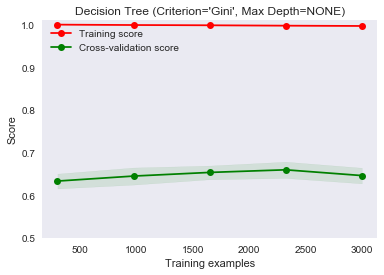

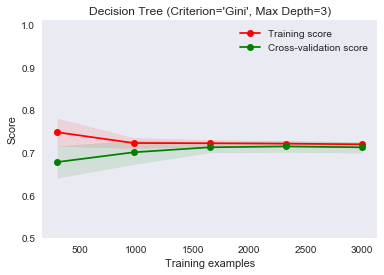

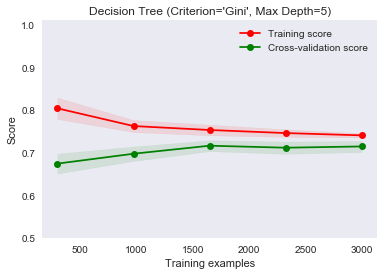

In [32]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Decision Tree (Criterion='Gini', Max Depth=NONE)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=0)

estimator = dtree
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)


title = "Decision Tree (Criterion='Gini', Max Depth=3)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=0)

estimator = dtree2
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)


title = "Decision Tree (Criterion='Gini', Max Depth=5)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=0)

estimator = dtree3
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

In [33]:
#BOOSTING

In [57]:
#AdaBoost, max depth=NONE: 
from sklearn.ensemble import AdaBoostClassifier 
classifier1 = AdaBoostClassifier(n_estimators=100)
classifier1.fit(X_train, y_train)
Y_pred = classifier1.predict(X_test)
acc_boosted_decision_tree = round(classifier1.score(X_test, y_test) * 100, 2)
acc_boosted_decision_tree

71.170000000000002

In [58]:
predictions = classifier1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.66      0.52      0.58       617
          1       0.74      0.83      0.78       989

avg / total       0.71      0.71      0.70      1606



In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[322 295]
 [168 821]]


In [60]:
#AdaBoost, max depth=3: ****************************************************************
from sklearn.ensemble import AdaBoostClassifier 
classifier2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=500, learning_rate=1.3)
classifier2.fit(X_train, y_train)
Y_pred = classifier2.predict(X_test)
acc_boosted_decision_tree = round(classifier2.score(X_test, y_test) * 100, 2)
acc_boosted_decision_tree

66.689999999999998

In [61]:
predictions = classifier2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


             precision    recall  f1-score   support

          0       0.57      0.51      0.54       617
          1       0.72      0.76      0.74       989

avg / total       0.66      0.67      0.66      1606



In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[317 300]
 [235 754]]


In [63]:
#AdaBoost, max depth=5: ***************************************************************
from sklearn.ensemble import AdaBoostClassifier 
classifier3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=500, learning_rate=1.3)
classifier3.fit(X_train, y_train)
Y_pred = classifier3.predict(X_test)
acc_boosted_decision_tree = round(classifier3.score(X_test, y_test) * 100, 2)
acc_boosted_decision_tree

65.819999999999993

In [64]:
predictions = classifier3.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.56      0.51      0.53       617
          1       0.71      0.75      0.73       989

avg / total       0.65      0.66      0.65      1606



In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[313 304]
 [245 744]]


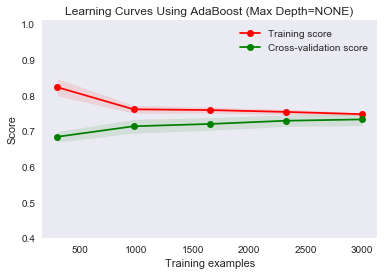

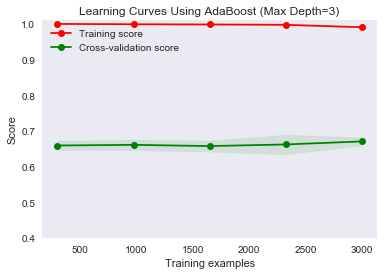

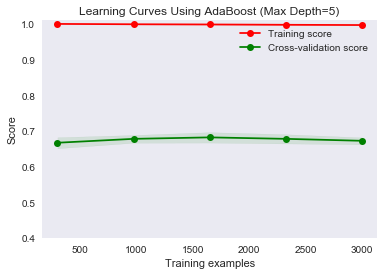

In [67]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, y_train


title = "Learning Curves Using AdaBoost (Max Depth=NONE)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=0)

estimator = classifier1
plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.01), cv=cv, n_jobs=4)


title = "Learning Curves Using AdaBoost (Max Depth=3)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=0)

estimator = classifier2
plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.01), cv=cv, n_jobs=4)


title = "Learning Curves Using AdaBoost (Max Depth=5)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=0)

estimator = classifier3
plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.01), cv=cv, n_jobs=4)
plt.show()

In [68]:
#Neural Networks

#run the following in Conda Prompt: 
#pip install keras
#pip install tensorflow==1.2.0

from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [72]:
#ANN Model1: 1 input layter, 1 hidden layer, 1 output layer:

model1 = Sequential()
#input layer
model1.add(Dense(12, input_dim=10, activation='sigmoid'))
# hidden layers
model1.add(Dense(8, activation='relu'))
# output layer
model1.add(Dense(1, activation='linear'))
#compliling the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fitting the model:
model1.fit(X_train, y_train, batch_size = 30, nb_epoch = 100)

C:\Users\sxf150130\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
3747/3747 [==============================] - 0s 87us/step - loss: 0.6848 - acc: 0.6274
Epoch 2/100
3747/3747 [==============================] - 0s 45us/step - loss: 0.6847 - acc: 0.6274
Epoch 3/100
3747/3747 [==============================] - 0s 43us/step - loss: 0.6848 - acc: 0.6274
Epoch 4/100
3747/3747 [==============================] - 0s 44us/step - loss: 0.6856 - acc: 0.6274
Epoch 5/100
3747/3747 [==============================] - 0s 40us/step - loss: 0.6852 - acc: 0.6274
Epoch 6/100
3747/3747 [==============================] - 0s 41us/step - loss: 0.6849 - acc: 0.6274
Epoch 7/100
3747/3747 [==============================] - 0s 45us/step - loss: 0.6866 - acc: 0.6274
Epoch 8/100
3747/3747 [==============================] - 0s 44us/step - loss: 0.6849 - acc: 0.6274
Epoch 9/100
3747/3747 [==============================] - 0s 45us/step - loss: 0.6845 - acc: 0.6274
Epoch 10/100
3747/3747 [==============================] - 0s 47us/step - loss: 0.6856 - acc: 0.6274
Epoch 11/

Epoch 83/100
3747/3747 [==============================] - 0s 46us/step - loss: 0.6841 - acc: 0.6282
Epoch 84/100
3747/3747 [==============================] - 0s 42us/step - loss: 0.6853 - acc: 0.6282
Epoch 85/100
3747/3747 [==============================] - 0s 45us/step - loss: 0.6845 - acc: 0.6282
Epoch 86/100
3747/3747 [==============================] - 0s 41us/step - loss: 0.6846 - acc: 0.6282
Epoch 87/100
3747/3747 [==============================] - 0s 36us/step - loss: 0.6857 - acc: 0.6280
Epoch 88/100
3747/3747 [==============================] - 0s 42us/step - loss: 0.6839 - acc: 0.6282
Epoch 89/100
3747/3747 [==============================] - 0s 49us/step - loss: 0.6846 - acc: 0.6282
Epoch 90/100
3747/3747 [==============================] - 0s 47us/step - loss: 0.6842 - acc: 0.6282
Epoch 91/100
3747/3747 [==============================] - 0s 45us/step - loss: 0.6847 - acc: 0.6282
Epoch 92/100
3747/3747 [==============================] - 0s 49us/step - loss: 0.6845 - acc: 0.6282


In [73]:
#evaluating the model 

##finding accuracy score 
scores = model1.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

1606/1606 [==============================] - 0s 69us/step

acc: 61.58%


In [74]:
## making predictions on new data and confusion matrix
predictions = np.round(model1.predict(X_test))

print(confusion_matrix(y_test, predictions))

[[  0 617]
 [  0 989]]


In [76]:
#defining history
history1 = model1.fit(X_train, y_train, validation_split=0.33, batch_size = 30, nb_epoch = 100, validation_data=(X_test, y_test))


Train on 3747 samples, validate on 1606 samples
Epoch 1/100
3747/3747 [==============================] - 0s 46us/step - loss: 0.6845 - acc: 0.6282 - val_loss: 0.6673 - val_acc: 0.6158
Epoch 2/100
  30/3747 [..............................] - ETA: 0s - loss: 0.6430 - acc: 0.6333

C:\Users\sxf150130\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


3747/3747 [==============================] - 0s 51us/step - loss: 0.6840 - acc: 0.6282 - val_loss: 0.6665 - val_acc: 0.6158
Epoch 3/100
3747/3747 [==============================] - 0s 54us/step - loss: 0.6840 - acc: 0.6282 - val_loss: 0.6746 - val_acc: 0.6158
Epoch 4/100
3747/3747 [==============================] - 0s 55us/step - loss: 0.6851 - acc: 0.6282 - val_loss: 0.6658 - val_acc: 0.6158
Epoch 5/100
3747/3747 [==============================] - 0s 54us/step - loss: 0.6849 - acc: 0.6282 - val_loss: 0.6666 - val_acc: 0.6158
Epoch 6/100
3747/3747 [==============================] - 0s 50us/step - loss: 0.6841 - acc: 0.6282 - val_loss: 0.6655 - val_acc: 0.6158
Epoch 7/100
3747/3747 [==============================] - 0s 55us/step - loss: 0.6846 - acc: 0.6282 - val_loss: 0.6688 - val_acc: 0.6158
Epoch 8/100
3747/3747 [==============================] - 0s 52us/step - loss: 0.6850 - acc: 0.6282 - val_loss: 0.6665 - val_acc: 0.6158
Epoch 9/100
3747/3747 [==============================] - 0s 

Epoch 62/100
3747/3747 [==============================] - 0s 52us/step - loss: 0.6604 - acc: 0.6288 - val_loss: 0.6674 - val_acc: 0.6146
Epoch 63/100
3747/3747 [==============================] - 0s 57us/step - loss: 0.6610 - acc: 0.6285 - val_loss: 0.6673 - val_acc: 0.6146
Epoch 64/100
3747/3747 [==============================] - 0s 53us/step - loss: 0.6609 - acc: 0.6288 - val_loss: 0.6693 - val_acc: 0.6146
Epoch 65/100
3747/3747 [==============================] - 0s 50us/step - loss: 0.6603 - acc: 0.6290 - val_loss: 0.6668 - val_acc: 0.6146
Epoch 66/100
3747/3747 [==============================] - 0s 64us/step - loss: 0.6618 - acc: 0.6288 - val_loss: 0.6669 - val_acc: 0.6146
Epoch 67/100
3747/3747 [==============================] - 0s 56us/step - loss: 0.6617 - acc: 0.6288 - val_loss: 0.6666 - val_acc: 0.6146
Epoch 68/100
3747/3747 [==============================] - 0s 60us/step - loss: 0.6603 - acc: 0.6288 - val_loss: 0.6671 - val_acc: 0.6146
Epoch 69/100
3747/3747 [=================

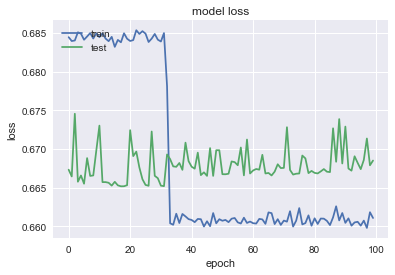

In [77]:

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

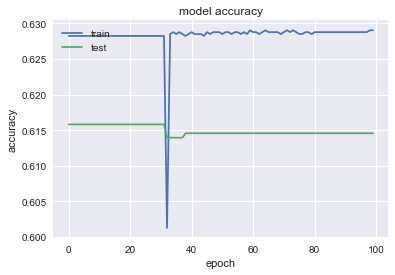

In [78]:
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
#KNN

In [94]:
#for KNN with K=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(metrics.accuracy_score(y_test, predictions))

0.610834371108


In [95]:
#for KNN with K=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.612079701121


In [96]:
# trying k=1 upto k=25 and recording testing accuracy
k_range = range(1, 26)

# Creating python dict using []
scores = []

# Using a loop for k=1 up to k=26 and appending the scores to the dictionay
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.60087173100871727, 0.55043586550435863, 0.61207970112079702, 0.58281444582814446, 0.61083437110834371, 0.59028642590286429, 0.60523038605230384, 0.60273972602739723, 0.6214196762141968, 0.61207970112079702, 0.61830635118306354, 0.61332503113325032, 0.61394769613947697, 0.60585305105853049, 0.6095890410958904, 0.60585305105853049, 0.6214196762141968, 0.61892901618929019, 0.61830635118306354, 0.61768368617683689, 0.61394769613947697, 0.61270236612702367, 0.61457036114570363, 0.6083437110834371, 0.62079701120797015]


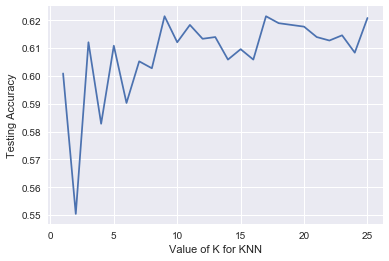

In [97]:
# plotting the relationship between k and testing accuracy

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [98]:
#highest testing accuracy for k=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.621419676214


In [99]:
print(confusion_matrix(y_test, predictions))

[[184 433]
 [175 814]]


In [37]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

  Detractor       0.00      0.00      0.00       617
   Promotor       0.62      1.00      0.76       989

avg / total       0.38      0.62      0.47      1606



C:\Users\sxf150130\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
confusion_matrix(y_test, predictions)

array([[  0, 617],
       [  0, 989]], dtype=int64)

In [39]:
print(metrics.accuracy_score(y_test, predictions))

0.615815691158


In [40]:
print('Coefficients: \n', logmodel.coef_)

Coefficients: 
 [[  9.29831796e-03   3.28572268e-04   5.93790342e-07   3.81332492e-03
    3.25242601e-03   4.05505495e-03   3.81457847e-03   1.64460302e-03
    3.39995401e-03   3.73410415e-03]]
